#### Notebook Description

__01 contains the project summary, data EDA/cleaning/preprocessing__

## Executive Summary
Using the Ames housing dataset, we can iteratively clean the data to create a pricing prediction model that can predict housing prices with reasonable accuracy.  Models will be uploaded to a Kaggle competition for scoring their performance against a dataset with unknown target pricing, however the production model will still be developed to stay generalized against all unknown data to avoid over-fitting and over-processing to match one specific Kaggle competition dataset.

## Data Science Problem
Do the provided features have a reasonably consistent correlation with housing prices in the Ames housing dataset, and can a linear regression model predict pricing on generalized unseen data sets of this housing data?

## Data Dictionary
[Link to local data dictionary](../DataDocumentation.txt)

#### Python Requirements
Code written in Python 3.7, libraries required includes pandas, numpy, matplotlib, seaborn, sklearn.

## Index Links
- [Import and Review Data](#Import-and-Review-Data)
- [Optional: Outlier Scanning](#Optional:-Outlier-Scanning)
- [Data Cleaning](#Data-Cleaning)
- [Review of Numerical Values](#Review-of-Numerical-Values)
- [Skewness Log Transformation](#Skewness-Log-Transformation)
- [Polynomial Features](#Polynomial-Features)

Optional: Outlier Scanning

In [2]:
# imports
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Import and Review Data

In [3]:
train = pd.read_csv('../datasets/train.csv')
test = pd.read_csv('../datasets/test.csv')

In [4]:
train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [5]:
test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [6]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,2051.0,1.474034e+03,8.439808e+02,1.0,753.5,1486.0,2.198000e+03,2930.0
PID,2051.0,7.135900e+08,1.886918e+08,526301100.0,528458140.0,535453200.0,9.071801e+08,924152030.0
MS SubClass,2051.0,5.700878e+01,4.282422e+01,20.0,20.0,50.0,7.000000e+01,190.0
Lot Frontage,1721.0,6.905520e+01,2.326065e+01,21.0,58.0,68.0,8.000000e+01,313.0
Lot Area,2051.0,1.006521e+04,6.742489e+03,1300.0,7500.0,9430.0,1.151350e+04,159000.0
Overall Qual,2051.0,6.112140e+00,1.426271e+00,1.0,5.0,6.0,7.000000e+00,10.0
Overall Cond,2051.0,5.562165e+00,1.104497e+00,1.0,5.0,5.0,6.000000e+00,9.0
Year Built,2051.0,1.971709e+03,3.017789e+01,1872.0,1953.5,1974.0,2.001000e+03,2010.0
Year Remod/Add,2051.0,1.984190e+03,2.103625e+01,1950.0,1964.5,1993.0,2.004000e+03,2010.0
Mas Vnr Area,2029.0,9.969591e+01,1.749631e+02,0.0,0.0,0.0,1.610000e+02,1600.0


In [7]:
test.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,879.0,1.445588e+03,8.507171e+02,2.0,692.5,1435.0,2197.0,2.928000e+03
PID,879.0,7.165050e+08,1.889135e+08,526302110.0,528486085.0,535454160.0,907192140.0,1.007100e+09
MS SubClass,879.0,5.827076e+01,4.221139e+01,20.0,20.0,50.0,70.0,1.900000e+02
Lot Frontage,719.0,6.963004e+01,2.362537e+01,21.0,59.0,68.0,80.0,1.820000e+02
Lot Area,879.0,1.034092e+04,1.004734e+04,1477.0,7298.5,9453.0,11606.5,2.152450e+05
Overall Qual,879.0,6.054608e+00,1.374756e+00,2.0,5.0,6.0,7.0,1.000000e+01
Overall Cond,879.0,5.565415e+00,1.128422e+00,1.0,5.0,5.0,6.0,9.000000e+00
Year Built,879.0,1.970534e+03,3.040353e+01,1880.0,1954.0,1972.0,2000.0,2.010000e+03
Year Remod/Add,879.0,1.984445e+03,2.045455e+01,1950.0,1967.0,1992.0,2003.0,2.010000e+03
Mas Vnr Area,878.0,1.069829e+02,1.883568e+02,0.0,0.0,0.0,173.5,1.378000e+03


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
Id                 2051 non-null int64
PID                2051 non-null int64
MS SubClass        2051 non-null int64
MS Zoning          2051 non-null object
Lot Frontage       1721 non-null float64
Lot Area           2051 non-null int64
Street             2051 non-null object
Alley              140 non-null object
Lot Shape          2051 non-null object
Land Contour       2051 non-null object
Utilities          2051 non-null object
Lot Config         2051 non-null object
Land Slope         2051 non-null object
Neighborhood       2051 non-null object
Condition 1        2051 non-null object
Condition 2        2051 non-null object
Bldg Type          2051 non-null object
House Style        2051 non-null object
Overall Qual       2051 non-null int64
Overall Cond       2051 non-null int64
Year Built         2051 non-null int64
Year Remod/Add     2051 non-null int64
Roof Style         20

In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879 entries, 0 to 878
Data columns (total 80 columns):
Id                 879 non-null int64
PID                879 non-null int64
MS SubClass        879 non-null int64
MS Zoning          879 non-null object
Lot Frontage       719 non-null float64
Lot Area           879 non-null int64
Street             879 non-null object
Alley              58 non-null object
Lot Shape          879 non-null object
Land Contour       879 non-null object
Utilities          879 non-null object
Lot Config         879 non-null object
Land Slope         879 non-null object
Neighborhood       879 non-null object
Condition 1        879 non-null object
Condition 2        879 non-null object
Bldg Type          879 non-null object
House Style        879 non-null object
Overall Qual       879 non-null int64
Overall Cond       879 non-null int64
Year Built         879 non-null int64
Year Remod/Add     879 non-null int64
Roof Style         879 non-null object
Roof M

## Optional: Outlier Scanning

We will use outlier detection with Luminol.  Specific columns can be specified, and if any rows are over a certain threshold, Luminol will report them as suspicious.  We will not remove any rows using this outlier detection, however with different housing data being fed in, this could be a useful tool for detecting outliers.

Luminol will scan and compare all rows in a column, then return rows that exceed the threshold score provided.  Sensitivity can be adjusted as needed.

In [ ]:
!pip install luminol

In [10]:
from luminol.anomaly_detector import AnomalyDetector

ts = train[train['SalePrice'].fillna(0) != 0]['SalePrice'].to_dict()
detector = AnomalyDetector(ts, algorithm_name='exp_avg_detector')
score = detector.get_all_scores()
for i, value in score.iteritems():
    if value > 3:
        print(i,value)

81 3.643837953182729
138 3.929253129580728
151 3.8483737983628776
800 3.3408359469855355
823 3.9108297854559715
934 3.1633298399031986
1035 3.142850818270162
1117 3.12307370103948
1158 3.2025367338440125
1164 3.5908811587745473
1227 3.4036904502417373
1592 3.7126386455134353
1671 4.364757432424422
1692 4.164759332144492
1796 4.305198440600173
1964 4.1959486162680415


In [16]:
train['SalePrice'].iloc[81:82]

81    501837
Name: SalePrice, dtype: int64

In [14]:
train['SalePrice'].iloc[1964:1965]

1964    591587
Name: SalePrice, dtype: int64

In [13]:
# None found for Total Bsmt SF over threshold of 3

ts = train[train['Total Bsmt SF'].fillna(0) != 0]['Lot Frontage'].to_dict()
detector = AnomalyDetector(ts, algorithm_name='exp_avg_detector')
score = detector.get_all_scores()
for i, value in score.iteritems():
    if value > 3:
        print(i,value)

## Data Cleaning

The following problems have been identified:

__1. Some columns have missing values:__
    1. 'Lot Frontage' blank values will be filled in with zeroes.
    2. 'Mas Vnr Type' blank values will be filled in with 'None' to match column.
    3. 'Mas Vnr Area' blank values will be filled in with zeroes.
    4. 'Bsmt Qual' missing values will be filled in with 'NA' to match column.
    5. 'Bsmt Cond' missing values will be filled in with 'NA' to match column.
    6. 'Bsmt Exposure' missing values will be filled in with 'NA' to match column.
    7. 'BsmtFin Type 1' missing values will be filled in with 'NA' to match column.
    8. 'BsmtFin SF 1' missing values will be filled in with zero to match column.
    9. 'BsmtFin Type 2' missing values will be filled in with 'NA' to match column.
    10. 'BsmtFin SF 2' missing values will be filled in with zero to match column.
    11. 'Bsmt Unf SF' missing values will be filled in with zero to match column.
    12. 'Total Bsmt SF' missing values will be filled in with zero to match column.
    13. 'Bsmt Full Bath' missing values will be filled in with zero to match column.
    14. 'Bsmt Half Bath' missing values will be filled in with zero to match column.
    15. 'Garage Yr Blt' missing values.  This feature will be deleted.
    16. 'Garage Finish' missing values will be filled in with 'NA' to match column.
    17. 'Garage Cars' missing values will be filled in with zero to match column.
    18. 'Garage Area' missing values will be filled in with zero to match column.
    19. 'Garage Qual' missing values will be filled in with 'NA' to match column.
    20. 'Garage Cond' missing values will be filled in with 'NA' to match column.
    
__2. Some columns have bad data:__
    1. 'Garage Yr Blt' in training dataset has one erroneous line, '2207'.  Will be replaced with '2006', year 
    the house was built.  This is an assumed best estimate to ensure the line can still be used in the model without dropping it entirely.



##### Correct the invalid garage year built in the training set

In [59]:
# fix the bad year value
train.loc[train['Garage Yr Blt'] == 2207]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
1699,2261,916384070,20,RL,68.0,8298,Pave,NaN,IR1,HLS,...,0,0,NaN,NaN,NaN,0,9,2007,New,267300


In [60]:
train.loc[1699, 'Garage Yr Blt'] = 2006
train.loc[1699, 'Garage Yr Blt']

2006.0

##### Update the blank rows for garage year built with the average year for the column

There are several options for cleaning this columns, such as mean, median, or dropping it entirely.  There are other fields that are relevant to the garage quality and size, so we should not impute a value for the field.  Imputing a value into all blank cells may give false information to the model, adding a "garage" to the home when none is present.

In [61]:
train.drop(['Garage Yr Blt'], axis=1, inplace=True)

In [62]:
test.drop(['Garage Yr Blt'], axis=1, inplace=True)

##### Update blank cells with zero, if their columns have zeroes instead of NA

Zeroes often imply data such as zero square feet (feature doesn't exist in the home).

In [63]:
# replace blanks with zeroes in relevant columns

# define which columns will have zeroes input
zero_columns = ['Lot Frontage', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 
               'Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Garage Cars', 'Garage Area']
train[zero_columns].isna().sum()

Lot Frontage      330
Mas Vnr Area       22
BsmtFin SF 1        1
BsmtFin SF 2        1
Bsmt Unf SF         1
Total Bsmt SF       1
Bsmt Full Bath      2
Bsmt Half Bath      2
Garage Cars         1
Garage Area         1
dtype: int64

In [64]:
test[zero_columns].isna().sum()

Lot Frontage      160
Mas Vnr Area        1
BsmtFin SF 1        0
BsmtFin SF 2        0
Bsmt Unf SF         0
Total Bsmt SF       0
Bsmt Full Bath      0
Bsmt Half Bath      0
Garage Cars         0
Garage Area         0
dtype: int64

In [65]:
for column in zero_columns:
    train[column] = train[column].fillna(value=0)
    test[column] = test[column].fillna(value=0)

In [66]:
train[zero_columns].isna().sum()

Lot Frontage      0
Mas Vnr Area      0
BsmtFin SF 1      0
BsmtFin SF 2      0
Bsmt Unf SF       0
Total Bsmt SF     0
Bsmt Full Bath    0
Bsmt Half Bath    0
Garage Cars       0
Garage Area       0
dtype: int64

In [67]:
test[zero_columns].isna().sum()

Lot Frontage      0
Mas Vnr Area      0
BsmtFin SF 1      0
BsmtFin SF 2      0
Bsmt Unf SF       0
Total Bsmt SF     0
Bsmt Full Bath    0
Bsmt Half Bath    0
Garage Cars       0
Garage Area       0
dtype: int64

##### Update blank cells with NA, if their columns have NA for nulls

Numpy will still interpret these as NaN values.  These will be further corrected later on.

In [68]:
# replace blanks with NA's in relevant columns

# define which columns will have zeroes input
na_columns = ['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Garage Finish', 
             'Garage Qual', 'Garage Cond']
train[na_columns].isna().sum()

Bsmt Qual          55
Bsmt Cond          55
Bsmt Exposure      58
BsmtFin Type 1     55
BsmtFin Type 2     56
Garage Finish     114
Garage Qual       114
Garage Cond       114
dtype: int64

In [69]:
for column in na_columns:
    train[column] = train[column].fillna(value='NA')
    test[column] = test[column].fillna(value='NA')
train[na_columns].isna().sum()

Bsmt Qual         0
Bsmt Cond         0
Bsmt Exposure     0
BsmtFin Type 1    0
BsmtFin Type 2    0
Garage Finish     0
Garage Qual       0
Garage Cond       0
dtype: int64

In [70]:
test[na_columns].isna().sum()

Bsmt Qual         0
Bsmt Cond         0
Bsmt Exposure     0
BsmtFin Type 1    0
BsmtFin Type 2    0
Garage Finish     0
Garage Qual       0
Garage Cond       0
dtype: int64

##### Update blank cells with None, if their columns have None for nulls

In [71]:
# replace blanks with 'None' in relevant columns
train['Mas Vnr Type'].isna().sum()

22

In [72]:
train['Mas Vnr Type'] = train['Mas Vnr Type'].fillna(value='None')
test['Mas Vnr Type'] = test['Mas Vnr Type'].fillna(value='None')
train['Mas Vnr Type'].isna().sum()

0

In [73]:
test['Mas Vnr Type'].isna().sum()

0

## Review of Numerical Values

Histograms of numerical values will be visualized.  This can assist in identifying which ones have skew that may need to be corrected.

In [74]:
train.shape

(2051, 80)

In [75]:
test.shape

(879, 79)

In [76]:
merged = pd.concat([train, test], axis = 0, sort=False)
num_merged = merged.select_dtypes(include = ['int64', 'float64'])
display(num_merged.head(3))

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
0,109,533352170,60,0.0,13517,6,8,1976,2005,289.0,...,0,44,0,0,0,0,0,3,2010,130500.0
1,544,531379050,60,43.0,11492,7,5,1996,1997,132.0,...,0,74,0,0,0,0,0,4,2009,220000.0
2,153,535304180,20,68.0,7922,5,7,1953,2007,0.0,...,0,52,0,0,0,0,0,1,2010,109000.0


In [77]:
merged.shape

(2930, 80)

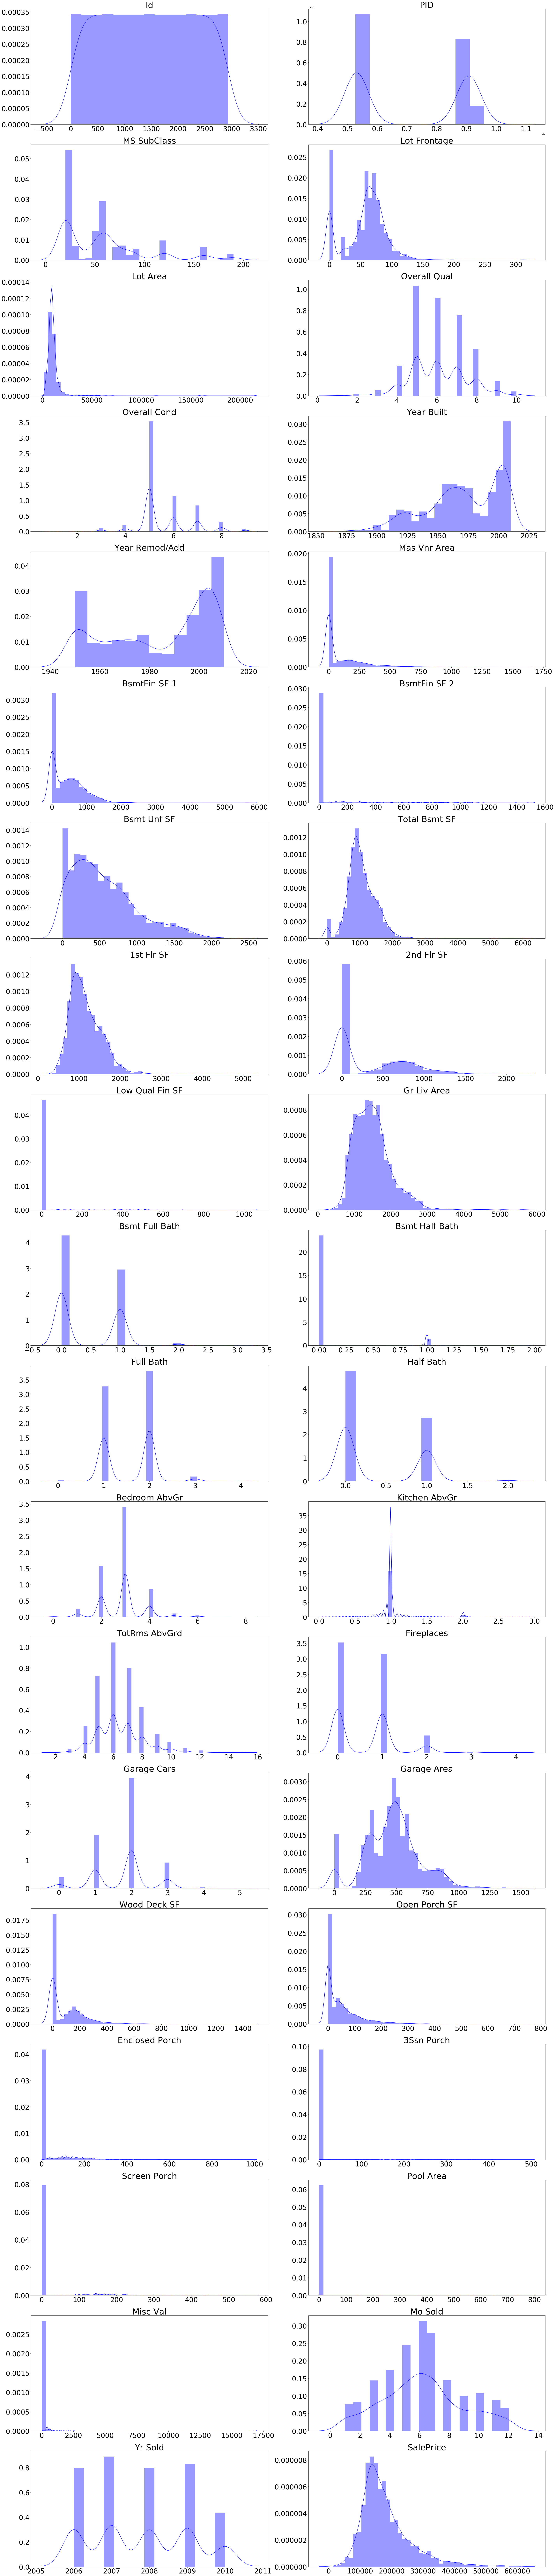

In [78]:
fig, axes = plt.subplots(nrows = 19, ncols = 2, figsize = (40, 200))
for ax, column in zip(axes.flatten(), num_merged.columns):
    sns.distplot(num_merged[column].dropna(), ax = ax, color = 'blue')
    ax.set_title(column, fontsize = 43)
    ax.tick_params(axis = 'both', which = 'major', labelsize = 35)
    ax.tick_params(axis = 'both', which = 'minor', labelsize = 35)
    ax.set_xlabel('')
fig.tight_layout(rect = [0, 0.03, 1, 0.95])

#### Categorical features that are represented as numerical will be converted.  Datatypes before and after the change are displayed.

In [79]:
display(num_merged.dtypes.value_counts())

int64      27
float64    11
dtype: int64

In [80]:
num_merged.head()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
0,109,533352170,60,0.0,13517,6,8,1976,2005,289.0,...,0,44,0,0,0,0,0,3,2010,130500.0
1,544,531379050,60,43.0,11492,7,5,1996,1997,132.0,...,0,74,0,0,0,0,0,4,2009,220000.0
2,153,535304180,20,68.0,7922,5,7,1953,2007,0.0,...,0,52,0,0,0,0,0,1,2010,109000.0
3,318,916386060,60,73.0,9802,5,5,2006,2007,0.0,...,100,0,0,0,0,0,0,4,2010,174000.0
4,255,906425045,50,82.0,14235,6,8,1900,1993,0.0,...,0,59,0,0,0,0,0,3,2010,138500.0


In [81]:
num_merged.loc[:,['MS SubClass', 'Overall Qual', 
             'Overall Cond','Mo Sold']] = num_merged.loc[:,['MS SubClass', 'Overall Qual', 
                                                        'Overall Cond', 'Mo Sold']].astype('object')

In [82]:
display(num_merged.dtypes.value_counts())

int64      23
float64    11
object      4
dtype: int64

In [83]:
num_merged.shape

(2930, 38)

In [84]:
# extract train and test dataframes, drop PID from both and SalePrice from the test data
df_train = num_merged.iloc[:2050, :].drop(columns = ['PID'], axis = 1)
df_test = num_merged.iloc[2051:, :].drop(columns = ['SalePrice', 'PID'], axis = 1)

In [85]:
df_merged = pd.concat([df_train, df_test], axis = 0, sort=False)

## Skewness Log Transformation

Linear regression requires features to have a normal distribution, so any numeric features with an excessive skew with be log transformed.

In [86]:
skew_merged = pd.DataFrame(data = df_merged.select_dtypes(include = ['int64', 'float64']).skew(), 
                           columns = ['Skewness'])
df_merged_num = df_merged.select_dtypes(include = ['int64', 'float64'])
display(df_merged_num.skew()[df_merged_num.skew()>0.75].index.values) 

array(['Lot Area', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF', '2nd Flr SF',
       'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Half Bath',
       'Kitchen AbvGr', 'TotRms AbvGrd', 'Wood Deck SF', 'Open Porch SF',
       'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area',
       'Misc Val', 'SalePrice'], dtype=object)

In [87]:
# make a copy of the SalePrice values to re-add back in after
y_temp = df_merged_num['SalePrice'].copy()

In [88]:
df_merged_skewed = np.log1p(df_merged_num[df_merged_num.skew()[df_merged_num.skew()>0.75].index])
df_merged_normal = df_merged_num[df_merged_num.skew()[df_merged_num.skew()< 0.75].index] # Normal variables
df_merged_num_all = pd.concat([df_merged_skewed, df_merged_normal], axis = 1)

df_merged_num.update(df_merged_num_all)

In [89]:
df_merged_num['SalePrice'] = y_temp

In [90]:
# original sale price is returned - shouldn't be log adjusted
df_merged_num.head()

,Id,Lot Frontage,Lot Area,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,...,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Yr Sold,SalePrice
0,109,0.0,9.511777,1976,2005,5.669881,6.280396,0.0,5.262690,6.587550,...,475.0,0.000000,3.806662,0.0,0.0,0.0,0.0,0.0,2010,130500.0
1,544,43.0,9.349493,1996,1997,4.890349,6.458338,0.0,5.624018,6.817831,...,559.0,0.000000,4.317488,0.0,0.0,0.0,0.0,0.0,2009,220000.0
2,153,68.0,8.977525,1953,2007,0.000000,6.595781,0.0,5.789960,6.964136,...,246.0,0.000000,3.970292,0.0,0.0,0.0,0.0,0.0,2010,109000.0
3,318,73.0,9.190444,2006,2007,0.000000,0.000000,0.0,5.953243,5.953243,...,400.0,4.615121,0.000000,0.0,0.0,0.0,0.0,0.0,2010,174000.0
4,255,82.0,9.563529,1900,1993,0.000000,0.000000,0.0,6.517671,6.517671,...,484.0,0.000000,4.094345,0.0,0.0,0.0,0.0,0.0,2010,138500.0


### Split the data back into train and test

In [91]:
# extract train and test dataframes, drop PID from both and SalePrice from the test data
df_train = merged.iloc[:2051, :].drop(columns = ['PID'], axis = 1)
df_test = merged.iloc[2051:, :].drop(columns = ['SalePrice', 'PID'], axis = 1)

In [92]:
merged.shape

(2930, 80)

In [93]:
df_train.shape

(2051, 79)

In [94]:
df_test.shape

(879, 78)

In [95]:
df_train.tail()

,Id,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
2046,1587,20,RL,79.0,11449,Pave,NaN,IR1,HLS,AllPub,...,0,0,NaN,NaN,NaN,0,1,2008,WD,298751.0
2047,785,30,RL,0.0,12342,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,3,2009,WD,82500.0
2048,916,50,RL,57.0,7558,Pave,NaN,Reg,Bnk,AllPub,...,0,0,NaN,NaN,NaN,0,3,2009,WD,177000.0
2049,639,20,RL,80.0,10400,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,11,2009,WD,144000.0
2050,10,60,RL,60.0,7500,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,189000.0


## Polynomial Features

We'll review what are the highest correlated columns, then run polynomial features on them.

In [96]:
corr_matrix = df_train.corr().abs()

#the matrix is symmetric so we need to extract upper triangle matrix without diagonal (k = 1)
sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
                 .stack()
                 .sort_values(ascending=False))

In [97]:
sol

Id               Yr Sold            0.975747
Garage Cars      Garage Area        0.893442
Gr Liv Area      TotRms AbvGrd      0.813333
Total Bsmt SF    1st Flr SF         0.808351
Overall Qual     SalePrice          0.800207
Gr Liv Area      SalePrice          0.697038
Bedroom AbvGr    TotRms AbvGrd      0.655439
Garage Area      SalePrice          0.649897
Garage Cars      SalePrice          0.647781
BsmtFin SF 1     Bsmt Full Bath     0.645697
2nd Flr SF       Gr Liv Area        0.639092
Total Bsmt SF    SalePrice          0.629303
Year Built       Year Remod/Add     0.629116
1st Flr SF       SalePrice          0.618486
Gr Liv Area      Full Bath          0.617323
2nd Flr SF       Half Bath          0.614656
Overall Qual     Year Built         0.602964
                 Garage Cars        0.587447
                 Year Remod/Add     0.584654
2nd Flr SF       TotRms AbvGrd      0.575327
Year Built       SalePrice          0.571849
Overall Qual     Gr Liv Area        0.566701
          

In [98]:
df_train.shape

(2051, 79)

In [99]:
poly = PolynomialFeatures(include_bias=False, interaction_only=True)

df_features = ['Garage Cars','Garage Area','Gr Liv Area','TotRms AbvGrd', 'Total Bsmt SF', '1st Flr SF', 
              'Bedroom AbvGr', 'TotRms AbvGrd']
poly.fit(df_train[df_features])

df_poly = pd.DataFrame(poly.transform(df_train[df_features]),columns=poly.get_feature_names(df_features))
df_poly = df_poly.drop(df_features,axis=1)

dat1 = df_train
dat2 = df_poly
df_train = pd.concat([dat1, dat2], axis=1)
df_train.drop(df_features, axis=1, inplace=True)

df_poly = pd.DataFrame(poly.transform(df_test[df_features]),columns=poly.get_feature_names(df_features))
df_poly = df_poly.drop(df_features,axis=1)

dat1 = df_test
dat2 = df_poly
df_test = pd.concat([dat1, dat2], axis=1)
df_test.drop(df_features, axis=1, inplace=True)

In [100]:
df_train.to_csv('../datasets/train_preprocessed.csv')
df_test.to_csv('../datasets/test_preprocessed.csv')